## 최적화 알고리즘

### 1. 아다그라드(Adagrad, Adaptive gradient)

- 아다그라드는 변수(가중치)의 업데이트 횟수에 따라 학습률을 조정하는 방법이다

- 아다그라드는 많이 변화하지 않는 변수들의 학습률은 크게 하고, 많이 여러 번 변화하는 변수들의 학습률은 작게 한다.

- 즉, 많이 변화한 변수는 최적 값에 근접했을 것이라는 가정하에 작은 크기로 이동하면서 세밀하게 값을 조정하고, 반대로 적게 변화한 변수들은 학습률을 크게 하여 빠르게 오차 값을 줄이고자 하는 방법이다.

$$w(i + 1) = w(i) - \frac{\eta}{\sqrt{G(i) + \epsilon}} \nabla E(w(i))$$
$$G(i) = G(i - 1) + (\nabla E(w(i)))^2$$

- 파라미터마다 다른 학습률을 주기 위해 G 함수를 추가한다.

- 이때 G 값은 이전 G 값의 누적(기울기 크기의 누적)이다.

- 기울기가 크면 G 값이 커지기 때문에 $\frac{\eta}{\sqrt{G(i) + \epsilon}}$ 값은 작아진다.

- 즉, 파라미터가 많이 학습되었으면 작은 학습률로 업데이트되고, 파라미터 학습이 덜 되었으면 개선의 여지가 많기 때문에 높은 학습률로 업데이트 된다.

- 아다그라드는 기울기가 0에 수렴하는 문제가 있어 사용하지 않으며, 대신에 알엠에스프롭을 사용한다.

### 2. 아다델타 (Adadelta, Adaptive delta)

- 아다델타는 아다그라드에서 G 값이 커짐에 따라 아직 최소값에 도달하지 못한 경우에도 학습이 멈추는 문제를 해결하기 위해 등장한 방법이다.

- 아다델타는 아다그라드의 수식에서 학습률($\eta$)을 D 함수(가중치의 변화량($\nabla$) 크기를 누적한 값)로 변환했기 때문에 학습률에 대한 하이퍼파라미터가 별도로 필요하지 않는다.

$$ w(i + 1) = w(i) - \frac{\sqrt{D(i-1) + \epsilon}}{\sqrt{G(i) + \epsilon}} \nabla E(w(i)) $$
$$ G(i) = \gamma G(i-1) + (1-\gamma)(\nabla E(w(i)))^2 $$
$$ D(i) = \gamma D(i-1) + (1-\gamma)(\nabla(w(i)))^2 $$

### 3. 알엠에스프롭(RMSProp)

- 알엠에스프롭은 아다그라드의 $G(i)$ 값이 무한히 커지는 것을 방지하고자 제안된 방법이다.

$$ w(i + 1) = w(i) - \frac{\eta}{\sqrt{G(i) + \epsilon}} \nabla E(w(i)) $$
$$ G(i) = \gamma G(i - 1) + (1 - \gamma)(\nabla E(w(i)))^2 $$

- 아다그라드에서 학습이 안 되는 문제를 해결하기 위해 G 함수에서 $\gamma$만 추가한다.

- 즉, G 값이 너무 크면 학습률이 작아져 학습이 안 될 수 있으므로 사용자가 $\gamma$값을 이용하여 학습률 크기를 비율로 조정할 수 있도록 한다.

### 4. 모멘텀(Momentum)

- 경사 하강법과 마찬가지로 매번 기울기를 구하지만, 가중치를 수정하기 전에 이전 수정 방향(+, -)을 참고하여 같은 방향으로 일정한 비율만 수정하는 방법이다.

- 수정이 양(+)의 방향과 음(-)의 방향으로 순차적으로 일어나는 지그재그 현상이 줄어들고, 이전 이동 값을 고려하여 일정 비율만큼 다음 값을 결정하므로 관성 효과를 얻을 수 있는 장점이 있다.

- SGD(확률적 경사 하강법)와 함께 사용한다.

    - 먼저 확률적 경사 하강법은 다음 수식에 의해 동작한다.

    $$ w(i + 1) = w(i) - \eta \nabla E(w(i)) $$

    - 이떄, $\eta \nabla E(w(i)) 수식을 사용하여 가중치를 계산하는데, 기울기 크기와 방향을 고려하여 가중치를 업데이트한다.

    - 즉, 기울기가 양수로 크면 음(-) 방향으로 크게 업데이트한다.

- 모멘텀에 SGD 적용 시 기울기$(\eta \nabla E(w(i)))$를 속도$(v, velocity)$로 대체하여 사용하는 방식으로, 이전 속도의 일정 부분을 반영한다.

- 즉, 이전에 학습했던 속도와 현재 기울기를 반영해서 가중치를 구한다.

$$ w(i + 1) = w(i) - v(i) $$
$$ v(i) = \gamma v(i - 1) + \eta \nabla E(w(i)) $$

- momentum 값은 0.9에서 시작하며 0.95, 0.99처럼 조금씩 증가시키면서 사용한다.

### 5. 네스테로프 모멘텀 (Nesterov Accelerated Gradient, NAG)

- 네스테로프 모멘텀은 모멘텀 값과 기울기 값이 더해져 실제 값을 만드는 기존 모멘텀과 달리 모멘텀 값이 적용된 지점에서 기울기 값을 계산한다.

- 모멘텀 방법은 멈추어야 할 시점에서도 관성에 의해 훨씬 멀리 갈 수 있는 단점이 있다. (오버 슈팅 문제)

- 네스테로프 방법은 모멘텀으로 절반 정도 이동한 후 어떤 방식으로 이동해야 하는지 다시 계산하여 결정하기 때문에 모멘텀 방법의 단점을 극복할 수 있다.

- 모멘텀 방법의 이점인 빠른 이동 속도는 그대로 가져가면서 멈추어야 할 적절한 시점에서 제동을 거는 데 훨씬 용이하다.

- 수식은 다음과 같다.

$$ w(i + 1) = w(i) - v(i) $$
$$ v(i) = \gamma v(i - 1) + \eta \nabla E(w(i) - \gamma v(i - 1)) $$

- 모멘텀과 비슷하지만 속도(v)를 구하는 과정에서 조금 차이가 있다.

- 이전에 학습했던 속도에 현재 가중치에서 이전 속도를 일정 비율 뺀 변화량을 반영해서(더해서) 가중치를 구한다.

### 4. 아담(Adam, Adaptive Moment Estimation)

- 아담은 알엠에스프롭과 모멘텀의 장점을 결합한 경사 하강법이다.

- 알엠에스프롭 특징인 기울기의 제곱을 지수 평균한 값과 모멘텀 특징인 $v(i)$를 수식에 활용한다.

- 즉, 알엠에스프롭의 $G$ 함수와 모멘텀의 $v(i)$를 사용하여 가중치를 업데이트한다.

$$ w(i + 1) = w(i) - \frac{\eta}{\sqrt{G(i) + \epsilon}} v(i) $$

$$ G(i) = \gamma_2 G(i - 1) + (1 - \gamma_2)(\nabla (E(w(i))))^2 $$

$$ v(i) = \gamma_1 v(i - 1) + \eta \nabla E(w(i)) $$

## 손글씨 분류1

In [1]:
# load_digits()를 통해 이미지 데이터 로드
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits 

digits = load_digits() # 1,797개의 이미지 데이터 로드

In [2]:
# 첫 번째 샘플 출력, 0을 흰색, 0보다 큰 숫자를 검은색 점이라고 볼 수 있음
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
# 첫 번째 샘플의 레이블 확인
print(digits.target[0])

0


In [4]:
# 전체 샘플 갯수 확인
print("전체 샘플의 수 : {}".format(len(digits.images)))

전체 샘플의 수 : 1797


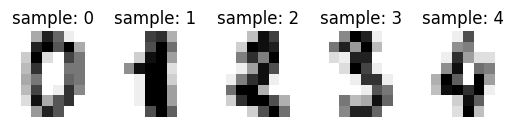

In [5]:
# 전체 샘플 중 상위 5개의 샘플만 시각화
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [6]:
# 상위 5개의 레이블 확인
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [7]:
# digits.data를 이용해 첫 번째 샘플 출력
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [8]:
# data를 X에 저장하고 레이블을 Y에 저장
X = digits.data   # 이미지. 즉, 특성 행렬
Y = digits.target   # 각 이미지에 대한 레이블

In [9]:
# 도구 임포트
import torch 
import torch.nn as nn
from torch import optim

In [10]:
# 모델 정의
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer1 = 32, hidden_layer2 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer2 = 16, output_layer = 10
)

In [11]:
# 데이터 로드
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [12]:
# 비용함수 정의
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.

In [13]:
# 옵티마이저 정의
optimizer = optim.Adam(model.parameters())

In [14]:
# 손실값
losses = []

In [15]:
# 훈련 실행
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forward 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print("Epoch {:4d}/{} Cost: {:.6f}".format(epoch, 100, loss.item()))

    losses.append(loss.item())

Epoch    0/100 Cost: 3.104278
Epoch   10/100 Cost: 2.176201
Epoch   20/100 Cost: 1.894731
Epoch   30/100 Cost: 1.589913
Epoch   40/100 Cost: 1.257655
Epoch   50/100 Cost: 0.940435
Epoch   60/100 Cost: 0.686137
Epoch   70/100 Cost: 0.520678
Epoch   80/100 Cost: 0.412468
Epoch   90/100 Cost: 0.338691


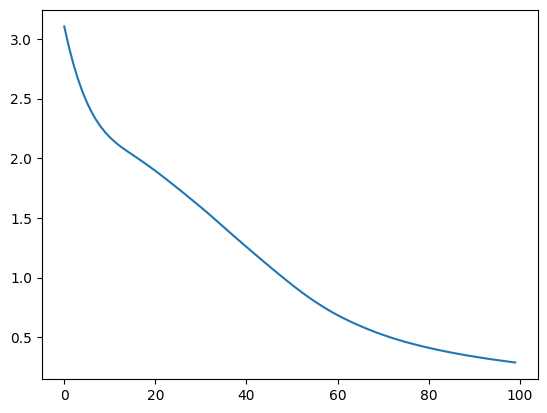

In [16]:
# 손실값 확인
plt.plot(losses)

예측 결과: 3
이 이미지 데이터의 정답 레이블은 3.000000입니다.


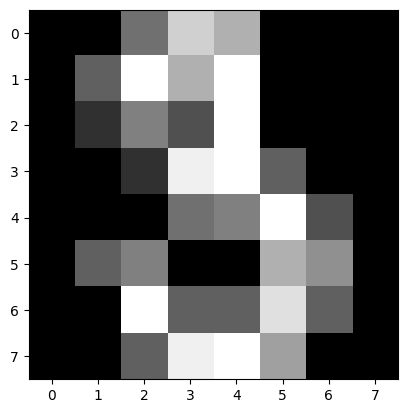

In [17]:
# 모델 테스트
import random

r = random.randint(0, len(X) - 1)
index = r
model.eval()
data = X[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과: {}".format(predicted))

X_test_show = (X[index]).numpy()
plt.imshow(X_test_show.reshape(8, 8), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:0f}입니다.".format(Y[index]))

## 손글씨 분류2

In [18]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
    
    def forward(self, x):
        x1 = self.fc1(x)
        x2 = self.relu(x1)
        x3 = self.fc2(x2)
        x4 = self.relu(x3)
        x5 = self.fc3(x4)
    
        return x5

In [20]:
download_root = './MNIST_data'

dataset1 = datasets.MNIST(root=download_root,
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)

dataset2 = datasets.MNIST(root=download_root,
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

In [21]:
batch_s = 100

# training dataset: dataset1_loader의 len은 600
# test dataset: dataset2_loader의 len은 100
dataset1_loader = DataLoader(dataset1, batch_size=batch_s)
dataset2_loader = DataLoader(dataset2, batch_size=batch_s)

In [22]:
model_dict = {}
loss_dict = {}
accuracy_dict = {}

# optimizer에 따른 학습 정도를 살펴볼 4가지 테스트 케이스
optimizer_case = ['SGD', 'Adam', 'AdaGrad', 'RMSprop']
for key in optimizer_case:
    model_dict[key] = Net()
    loss_dict[key] = []
    accuracy_dict[key] = []

In [23]:
# 4가지 테스트케이스에 대한 optimizer  정의
optimizer_dict = {}
optimizer_dict['SGD'] = optim.SGD(model_dict['SGD'].parameters(), lr=0.001)
optimizer_dict['Adam'] = optim.Adam(model_dict['Adam'].parameters(), lr=0.001)
optimizer_dict['AdaGrad'] = optim.Adagrad(model_dict['AdaGrad'].parameters(), lr=0.001)
optimizer_dict['RMSprop'] = optim.RMSprop(model_dict['RMSprop'].parameters(), lr=0.001)

In [24]:
# loss_function, total batch size, epoch 정의
loss_function = nn.CrossEntropyLoss()
total_batch = len(dataset1_loader) # 600 (60000 / 100) => (train dataset / batch_size)
epochs = np.arange(1, 16)

In [25]:
# 총 4가지 optimizer를 사용하여 학습
for optimizer_name, optimizer in optimizer_dict.items():
    print(optimizer_name)
    for epoch in epochs:
        cost = 0
        for images, labels in dataset1_loader: # dataloader는 image와 label로 구성
            # 하나의 Tensor에 데이터 784(28x28)개가 담긴 리스트가 100개 들어있음
            # 그리고 그것이 총 dataset1_loader의 len인 600개가 존재
            images = images.reshape(100, 784)

            model_dict[optimizer_name].zero_grad()

            # feed forward
            predict = model_dict[optimizer_name].forward(images)

            # loss 값 구하기
            loss = loss_function(predict, labels) # 예측된 것과 label이 얼마나 차이가 나는지

            # back propagation
            loss.backward()

            # optimizer update
            optimizer.step()

            cost += loss # 총 600번의 loss를 더한다

        with torch.no_grad(): # 추론 시 미분하지 않겠다
            total = 0
            correct = 0
            for images, labels in dataset2_loader:
                images = images.reshape(100, 784)

                outputs = model_dict[optimizer_name].forward(images)

                # torch.max에서 두 번째 인자는 dim을 의미
                # 1로 지정했다는 것은 하나의 행에서 가장 큰 값을 찾겠다는 것
                # dim을 지정하면 인덱스에 있는 값과 인덱스를 반환
                _, predict = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predict == labels).sum() # 예측한 것과 labels이 얼마나 일치하는지
        
        avg_cost = cost / total_batch # loss 값 600개의 평균
        accuracy = 100 * (correct / total)

        loss_dict[optimizer_name].append(avg_cost.detach().numpy())
        accuracy_dict[optimizer_name].append(accuracy)

        print("epoch : {} | loss : {:.6f}".format(epoch, avg_cost))
        print("Accuracy : {:.2f}".format(accuracy))        

SGD
epoch : 1 | loss : 2.292336
Accuracy : 20.46
epoch : 2 | loss : 2.268920
Accuracy : 31.99
epoch : 3 | loss : 2.241601
Accuracy : 37.99
epoch : 4 | loss : 2.204941
Accuracy : 39.35
epoch : 5 | loss : 2.153587
Accuracy : 40.82
epoch : 6 | loss : 2.082559
Accuracy : 45.73
epoch : 7 | loss : 1.986774
Accuracy : 52.59
epoch : 8 | loss : 1.861760
Accuracy : 59.27
epoch : 9 | loss : 1.706327
Accuracy : 65.23
epoch : 10 | loss : 1.527432
Accuracy : 69.82
epoch : 11 | loss : 1.343604
Accuracy : 73.89
epoch : 12 | loss : 1.175998
Accuracy : 76.46
epoch : 13 | loss : 1.035915
Accuracy : 78.88
epoch : 14 | loss : 0.923821
Accuracy : 80.47
epoch : 15 | loss : 0.835301
Accuracy : 81.86
Adam
epoch : 1 | loss : 0.410443
Accuracy : 93.70
epoch : 2 | loss : 0.181695
Accuracy : 95.18
epoch : 3 | loss : 0.126748
Accuracy : 95.90
epoch : 4 | loss : 0.094931
Accuracy : 96.17
epoch : 5 | loss : 0.074307
Accuracy : 96.72
epoch : 6 | loss : 0.059223
Accuracy : 96.82
epoch : 7 | loss : 0.047088
Accuracy : 9

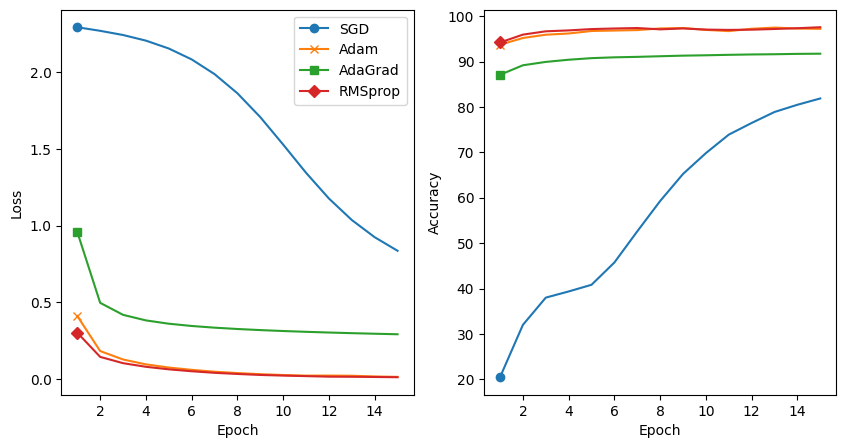

In [26]:
markers = {'SGD' : 'o', 'Adam' : 'x', 'AdaGrad' : 's', 'RMSprop' : 'D'}
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

for key in optimizer_case:
    plt.plot(epochs, loss_dict[key], marker=markers[key], markevery=100, label=key)
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.subplot(1, 2, 2)
for key in optimizer_case:
    plt.plot(epochs, accuracy_dict[key], marker=markers[key], markevery=100, label=key)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()